<a href="https://colab.research.google.com/github/DmitriyGord/MachineLearningLabs/blob/main/Laba4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/playstore-analysis.csv', sep=',')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
df = df.drop(['App', 'Android Ver', 'Current Ver', 'Price', 'Genres'], axis='columns')

def replace_cr(cr):
  if cr == ('Everyone'):
    return 1
  return 0

df['Content Rating'] = df['Content Rating'].apply(replace_cr)

counts = df['Category'].value_counts()
nan_count = df['Category'].isnull().sum()

def replace_cat(cat):
  if pd.isnull(cat):
    return nan_count
  return counts[cat]

df['Category'] = df['Category'].apply(replace_cat) 

def delplus(inst):
  return inst[:-1]

df['Installs'] = df['Installs'].apply(delplus) 

def strtoint(string):
  if ',' in string:
    return int(string.replace(',',''))
  return string

df['Installs'] = df['Installs'].apply(strtoint)
df = df.drop([10472])
df['Installs'] = pd.to_numeric(df['Installs'])
def textsplit(text):
  return text.split(',')[-1]
  
df['Last Updated'] = df['Last Updated'].apply(textsplit)
df['Last Updated'] = df['Last Updated'].astype(int)

df['Reviews'] = pd.to_numeric(df['Reviews'])
def f4free(free):
  if free == ('Free'):
    return 1
  return 0
  
df['Type'] = df['Type'].apply(f4free)

def binary_nans(value):
  if pd.isnull(value):
    return 2.5
  return value

for col in ['Rating']:
  df[col] = df [col].apply(binary_nans)

df = df.drop([9148])

In [ ]:
X = df[df.columns.difference(['Type'])]
y = df['Type']

In [ ]:
X.shape, y.shape

((10839, 7), (10839,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
first_tree = DecisionTreeClassifier(random_state=17)

In [ ]:
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [ ]:
y_pred =  first_tree.predict(X_test)
print('Точность измерений (тестовые данные): ', accuracy_score(y_true = y_test, y_pred = y_pred))

Точность измерений (тестовые данные):  0.9102091020910209


Данные обучались на модели дерево решений при разных параметрах и заметили что модель переобучалась

In [ ]:
# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

In [ ]:
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

from sklearn import metrics
print("Accuracy score: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy score: 93.36%


In [ ]:
# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

# Оцениваем точность на тестовом датасете с помощью кросс валидации
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

CV accuracy score: 94.24%


In [ ]:
rfc.feature_importances_

array([0.12975841, 0.01846685, 0.17904048, 0.0753875 , 0.11269303,
       0.26793779, 0.21671594])

In [ ]:
col = [i for i in range(7)]
listValues = rfc.feature_importances_
myDict = {col[i]:listValues[i] for i in range(0, len(col), 1)} 
for key in myDict:
    print(key, '->', myDict[key])

0 -> 0.12975840784307802
1 -> 0.018466851453636902
2 -> 0.1790404773034813
3 -> 0.0753875005876688
4 -> 0.11269303466122281
5 -> 0.2679377911625925
6 -> 0.2167159369883198


In [ ]:
# если значения признака меньше 0.01 удалим его (считаем их близкими к нулю)
key_new = list()
for key in myDict:
    if myDict[key] < 0.0000001:
        key_new.append(key)
print(key_new) # номера столбцов которые мы будем удалять для метода ближайших соседей

[]


Для алгоритма случайного леса все признаки оказались важными

In [ ]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 935,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [ ]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(max_depth=20, max_features=4, n_jobs=-1, oob_score=True,
                        random_state=42), 0.9446445082817233)

Лучшая точность, который мы смогли достичь с помощью перебора параметров — 94.46% при:  'n_estimators':100, 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
%%time

from catboost import CatBoostRegressor
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y)
scores = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 4)):
    for j, depth in enumerate(np.arange(2, 12)):
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth).fit(X_train, y_train).predict(X_test)
        scores[i, j] = mean_squared_error(y_test, p)

Learning rate set to 0.5
0:	learn: 0.2570236	total: 48.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2547017	total: 1.79ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2536274	total: 1.63ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2512516	total: 1.78ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2500069	total: 2.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2486413	total: 3.35ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2472277	total: 4.84ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2470768	total: 6.73ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2466789	total: 11.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2458698	total: 18.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2570236	total: 3.84ms	remaining: 127ms
1:	learn: 0.2526753	total: 5.65ms	remaining: 90.4ms
2:	learn: 0.2504425	total: 7.03ms	remaining: 72.7ms
3:	learn: 0.2490922	total: 8.45ms	remaining: 63.4ms
4:	learn: 0.2480777	total: 9.

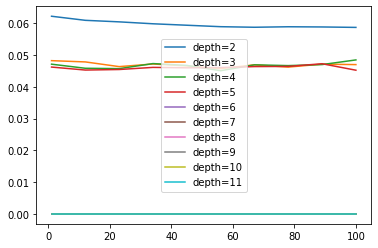

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

for i in range(scores.shape[0]):
    plt.plot(np.linspace(1, 100, 10), scores[i], label='depth=' + str(np.arange(2, 12)[i]))
plt.legend()

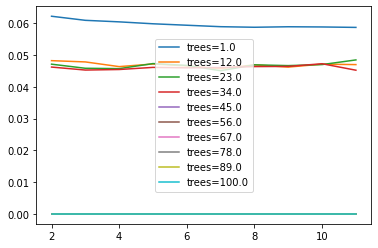

In [ ]:
for i in range(scores.shape[1]):
    plt.plot(np.arange(2, 12), scores[i], label='trees=' + str(np.linspace(1, 100, 10)[i]))
plt.legend()

In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor

linear_preds = RandomForestRegressor(n_estimators=100, max_depth = 20, max_features = 4, min_samples_leaf = 1).fit(X_train, y_train).predict(X_test)
res5 = mean_squared_error(y_test, linear_preds) ** 0.5
print(res5)

0.20656529401595836
CPU times: user 876 ms, sys: 3.19 ms, total: 879 ms
Wall time: 878 ms


Итог: случайный лес отработал хуже градиентного бустинга